# Medical data classification using Decision Tree

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!ls

'0. Routine_UEM_July-Dec_2022_06.08.2022_Final.xlsx'
'12020002001140 (1).pdf'
'12020002001140_(1).pdf'
'12020002001140 (2).pdf'
'12020002001140_(2).pdf'
'12020002001140 (3).pdf'
'12020002001140_(3).pdf'
'12020002001140 (4).pdf'
'12020002001140_(4).pdf'
'12020002001140 (5).pdf'
'12020002001140_(5).pdf'
'12020002001140 (6).pdf'
 12020002001140_DAA_Lab.pdf
 12020002001140_DAA.pdf
'12020002001140_Kurangam Bhowmik_BSC201_Physics.pdf'
'12020002001140_Kurangam Bhowmik_BSC204_Math.pdf'
'12020002001140_Kurangam Bhowmik_CSC202_PYTHON PROGRAMMING.pdf'
'12020002001140_Kurangam Bhowmik_Dsa.pdf'
'12020002001140_Kurangam Bhowmik_EEC202_BEE.pdf'
'12020002001140_Kurangam Bhowmik_GSC202_ESP-SDP 2.pdf'
'12020002001140_Kurangam Bhowmik_HSM202_ENG.pdf'
'12020002001140_Kurangam Bhowmik_HSM283_EFES2.pdf'
'12020002001140_Kurangam Bhowmik_HSM284_DESIGN THINKING AND INNOVATION.pdf'
'12020002001140_Kurangam Bhowmik.pdf'
 12020002001140_math_assignment.pdf
 12020002001140.pdf
 12020002001140_q1.pdf
 1202000200114

In [ ]:
from scipy.io import loadmat
#path="/content/drive/MyDrive/UEM/AIML LAB/Classification/"
path="./content/drive/MyDrive/Colab Notebooks/Copy of classification_DT_final.ipynb"
data = loadmat('/content/drive/MyDrive/Classification/pima_dataset.mat')
X=data['norm_data']
y=data['target']
X.shape

(768, 8)

In [ ]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.metrics import *

# Classification performance measure function

In [ ]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [ ]:
k=10;
kf = KFold(n_splits=10)
acc=np.zeros(k,float)
recall=np.zeros(k,float)
spec=np.zeros(k,float)
precision=np.zeros(k,float)
F1=np.zeros(k,float)
GM=np.zeros(k,float)
FPR=np.zeros(k,float)
iter=0;
for train, test in kf.split(X):
    
    print("Fold:%d" % (iter))
    #print("%s %s" % (train, test))
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    hidden_nodes=X_train.shape[1]
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]))
    iter=iter+1
print('=======================================AVERAGE OVER K-FOLD===================================')
print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (acc.mean(), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))  

Fold:0
Accuracy: 0.62, Recall=0.67, specificity=0.55, precision=0.69, F1=0.68, GM=0.61, FPR=0.45
Fold:1
Accuracy: 0.77, Recall=0.82, specificity=0.60, precision=0.85, F1=0.84, GM=0.70, FPR=0.40
Fold:2
Accuracy: 0.66, Recall=0.72, specificity=0.61, precision=0.65, F1=0.68, GM=0.66, FPR=0.39
Fold:3
Accuracy: 0.62, Recall=0.69, specificity=0.52, precision=0.70, F1=0.69, GM=0.60, FPR=0.48
Fold:4
Accuracy: 0.69, Recall=0.76, specificity=0.56, precision=0.76, F1=0.76, GM=0.65, FPR=0.44
Fold:5
Accuracy: 0.70, Recall=0.71, specificity=0.67, precision=0.85, F1=0.78, GM=0.69, FPR=0.33
Fold:6
Accuracy: 0.77, Recall=0.91, specificity=0.41, precision=0.79, F1=0.85, GM=0.61, FPR=0.59
Fold:7
Accuracy: 0.77, Recall=0.83, specificity=0.64, precision=0.83, F1=0.83, GM=0.73, FPR=0.36
Fold:8
Accuracy: 0.63, Recall=0.71, specificity=0.40, precision=0.77, F1=0.74, GM=0.53, FPR=0.60
Fold:9
Accuracy: 0.71, Recall=0.74, specificity=0.65, precision=0.80, F1=0.77, GM=0.70, FPR=0.35
==============================

In [ ]:
conf_matrix

array([[35, 11],
       [12, 18]])

[Text(0.5440385114107884, 0.9705882352941176, 'x[1] <= 0.721\ngini = 0.451\nsamples = 692\nvalue = [454, 238]'),
 Text(0.19518283195020747, 0.9117647058823529, 'x[5] <= 0.402\ngini = 0.361\nsamples = 533\nvalue = [407, 126]'),
 Text(0.06639004149377593, 0.8529411764705882, 'x[1] <= 0.626\ngini = 0.075\nsamples = 154\nvalue = [148, 6]'),
 Text(0.03319502074688797, 0.7941176470588235, 'x[5] <= 0.394\ngini = 0.031\nsamples = 127\nvalue = [125, 2]'),
 Text(0.016597510373443983, 0.7352941176470589, 'x[6] <= 0.255\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.008298755186721992, 0.6764705882352942, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.024896265560165973, 0.6764705882352942, 'x[6] <= 0.268\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.016597510373443983, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03319502074688797, 0.6176470588235294, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.04979253112033195, 0.7352941176470589,

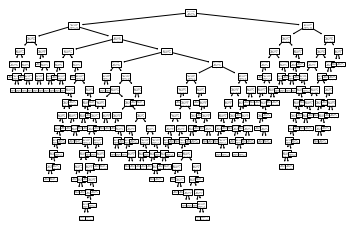

In [ ]:
tree.plot_tree(clf)